--- Initializing Log System ---
Current Date and Time: 2025-11-24 11:30:38
Current Date and Time: 2025-11-24 11:30:38
Current Date and Time: 2025-11-24 11:30:38
Current Date and Time: 2025-11-24 11:30:38
Current Date and Time: 2025-11-24 11:30:38

--- Security Operations ---
User check for 'user_jdoe_456': True

--- Search and Analysis ---

Log Entries containing 'connection':
  category           timestamp                     message     level
0    error 2025-11-24 11:30:38  Database connection failed  CRITICAL

Log Level Summary:
level
HIGH        2
CRITICAL    1
MEDIUM      1
LOW         1
Name: count, dtype: int64


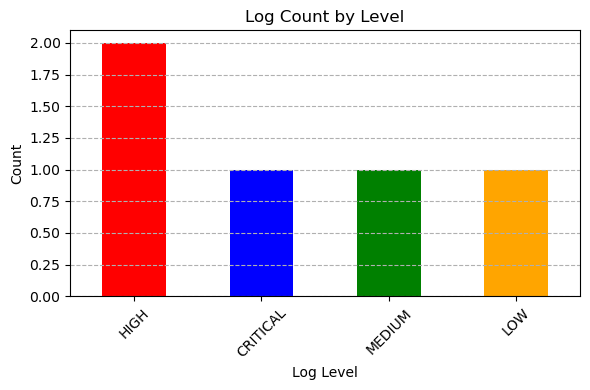


--- Maintenance Operation ---
Cleared 2 logs in category 'access'.

Total logs remaining: 3


In [ ]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class Logging_Functions:
    def __init__(self):
        self.categories = { "error": [], "info": [], "access": [] }
    
    def add_log_entry(self, category, message, level):
        current_time = datetime.datetime.now()
        now = current_time.strftime("%Y-%m-%d %H:%M:%S")
        print(f"Current Date and Time: {now}")

        log_entry = (category, now, message, level) 
        if category in self.categories:
            self.categories[category].append(log_entry)
        else:
            print(f"Warning: Category '{category}' not found. Log not added.")
    
    def get_logs_by_category(self, category):
       return self.categories.get(category, [])
    
    def get_recent_logs(self):
        log_list = []
        for logs in self.categories.values():
            log_list.extend(logs)
        return log_list[-3:]

    def get_all_logs_flat(self):
        all_logs = []
        for logs in self.categories.values():
            all_logs.extend(logs)
        return all_logs
    
class Security_and_Uniqueness:
    def __init__(self):
        self.user_ids = set()
    
    def register_authorized_user(self, user_id):
        self.user_ids.add(user_id)
        return user_id[-3:] if len(user_id) >= 3 else user_id
 
    def authorized_user_access(self, user_id):
        return user_id in self.user_ids
    
    def remove_user_access(self, user_id):
        self.user_ids.discard(user_id)

class SearchAndAnalysis:
    def __init__(self, log_data_source):
        self.log_data_source = log_data_source
        self.df = self._create_dataframe()

    def _create_dataframe(self):
        logs = self.log_data_source.get_all_logs_flat()
        if not logs:
            return pd.DataFrame(columns=["category", "timestamp", "message", "level"])
        
        log_structure = ("category", "timestamp", "message", "level")
        df = pd.DataFrame(logs, columns=log_structure)
        df["timestamp"] = pd.to_datetime(df["timestamp"])
        return df

    def find_logs_by_keyword(self, keyword):
        self.df = self._create_dataframe()
        if self.df.empty:
            return pd.DataFrame(columns=["category", "timestamp", "message", "level"])

        mask = self.df["message"].astype(str).str.contains(keyword, case=False, na=False)
        return self.df[mask].copy() 
    
    def get_unique_log_levels(self):
        self.df = self._create_dataframe()
        if self.df.empty:
            return set()
        return set(self.df["level"].unique())
    
    def summarize_log_counts(self):
        self.df = self._create_dataframe()
        if self.df.empty:
            return pd.Series(dtype=int)
        return self.df["level"].value_counts()
        

class Maintaince_and_Utiltiy:
    def __init__(self, log_storage):
        self.log_storage = log_storage
        
    def clear_logs(self, category=None):
        if category is None:
            for key in self.log_storage.categories:
                self.log_storage.categories[key] = []
            print("All logs cleared")
        elif category in self.log_storage.categories:
            initial_count = len(self.log_storage.categories[category])
            self.log_storage.categories[category] = []
            cleared_count = initial_count
            print(f"Cleared {cleared_count} logs in category '{category}'.")
        else:
            print(f"Warning: Category '{category}' not found.")





log_manager = Logging_Functions()

log_manager.add_log_entry("error", "Database connection failed", "CRITICAL")
log_manager.add_log_entry("info", "User 'admin' logged in successfully", "HIGH")
log_manager.add_log_entry("access", "GET request to /api/data", "LOW")
log_manager.add_log_entry("error", "Timeout occurred during API call", "MEDIUM")
log_manager.add_log_entry("access", "Unauthorized access attempt: 192.168.1.1", "HIGH")



security = Security_and_Uniqueness()
security.register_authorized_user("user_jdoe_456")
print(f"User check for 'user_jdoe_456': {security.authorized_user_access('user_jdoe_456')}")



analyzer = SearchAndAnalysis(log_manager)

keyword_results = analyzer.find_logs_by_keyword("connection")

print(keyword_results)

summary = analyzer.summarize_log_counts()
print("\nLog Level Summary:")
print(summary)

if not summary.empty:
    plt.figure(figsize=(6, 4))
    summary.plot(kind='bar', color=['red', 'blue', 'green', 'orange'])
    plt.title('Log Count by Level')
    plt.xlabel('Log Level')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()
    plt.show()
    


maintenance = Maintaince_and_Utiltiy(log_manager)

maintenance.clear_logs(category="access")

remaining_logs = log_manager.get_all_logs_flat()
print(f"\nTotal logs remaining: {len(remaining_logs)}")